# IMPORT LIBRARY

In [1]:
import os
import time
import zipfile

import ipywidgets as widgets
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plt_image
plt.style.use('seaborn')

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as keras_image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

from tensorflow.keras.callbacks import TensorBoard
%load_ext tensorboard

<ipython-input-1-8ef6ad1ca955>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# SAMBUNGKAN KE GOOGLE DRIVE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EKSTRAK DATASET AKSARA JAWA

In [3]:
filename = '/content/drive/MyDrive/2024/JUNI/BELAJAR/Hanacaraka AI by Iqbal | github.com IqbalLx Hanacaraka-AI/datasetv3.zip'
zip_ref = zipfile.ZipFile(filename)
zip_ref.extractall()
zip_ref.close()

# DATA PREPROCESSING
IMAGE DATA GENERATOR


In [4]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   shear_range=0.1)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    'datasetv2/training',
    target_size=(224, 224),
    batch_size=32,
    color_mode='grayscale',
    class_mode = 'categorical'
)

val_generator = validation_datagen.flow_from_directory(
    'datasetv2/testing',
    target_size=(224, 224),
    batch_size=32,
    color_mode='grayscale',
    class_mode = 'categorical'
)

Found 3120 images belonging to 20 classes.
Found 1299 images belonging to 20 classes.


MEMBUAT FUNGSI VISUALISASI AKURASI DAN KESALAHAN SERTA PENGUJUAN DATA PELATIHAN

In [5]:
def plot(hist):
  history = hist.history
  history['epoch'] = hist.epoch

  plt.figure(figsize=(12, 5))

  plt.subplot(121)
  plt.plot(history['epoch'], history['loss'], label='Loss')
  plt.plot(history['epoch'], history['val_loss'], label='Val Loss', color='orange')
  plt.legend()

  plt.subplot(122)
  plt.plot(history['epoch'], history['accuracy'], label='Acc')
  plt.plot(history['epoch'], history['val_accuracy'], label='Val Acc', color='orange')
  plt.legend()

  return plt.show()

def load_image(img_path):
  img = load_img(img_path, color_mode='grayscale', target_size=(224, 224))
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = np.vstack([img])
  img /= 255.0  # Normalisasi jika diperlukan
  return img


# MEMBUAT MODEL DASAR

MEMBUAT KELAS DAN PROSES AUGMENTASI

In [6]:
classes = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma',
          'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

base_model = Sequential([Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 1)),
          MaxPool2D(2, 2),
          Conv2D(32, (3, 3), activation='relu'),
          MaxPool2D(2, 2),
          Conv2D(32, (3, 3), activation='relu'),
          MaxPool2D(2, 2),
          Conv2D(64, (3, 3), activation='relu'),
          MaxPool2D(2, 2),
          Conv2D(64, (3, 3), activation='relu'),
          MaxPool2D(2, 2),
          Flatten(),
          Dropout(0.5),
          Dense(128, activation='relu'),
          Dense(20, activation='softmax')])

base_model.compile(
  loss='categorical_crossentropy',
  optimizer='Adam',
  metrics=['accuracy']
)

base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 32)        0

PELATIHAN DATASET

In [ ]:
base_hist = base_model.fit(
    train_generator,
    epochs = 54,
    steps_per_epoch = int(1762/32),
    validation_data = val_generator,
    validation_steps= int(979/32),
    callbacks=[tensorboard],
    verbose=1
)

# UJI COBA MODEL DASAR

MEMASUKKAN DATA HASIL PELATIHAN

In [7]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/model/baseline/base_model.h5')

PENGUJIAN PERTAMA, MEMPREDIKSI DARI MASUKKAN NAMA AKSARA JAWA

Nama huruf: ba
Loading image from: /content/datasetv2/prediction/ba17.png
New image shape: (1, 224, 224, 1)
1/1 [==============================] - 0s 308ms/step
Raw prediction: [[8.9208776e-01 2.4619196e-09 1.4070479e-15 7.3515366e-08 1.7212992e-08
  1.8117295e-05 7.4283640e-13 2.7909766e-09 1.2140779e-12 1.1780611e-06
  2.2692762e-10 2.8735353e-06 1.0787476e-01 3.9525428e-08 1.2886709e-14
  9.8922789e-14 1.4685157e-05 1.6797290e-07 2.2338611e-07 1.7523216e-12]]
Predicted class index: 0
Predicted class name: ba


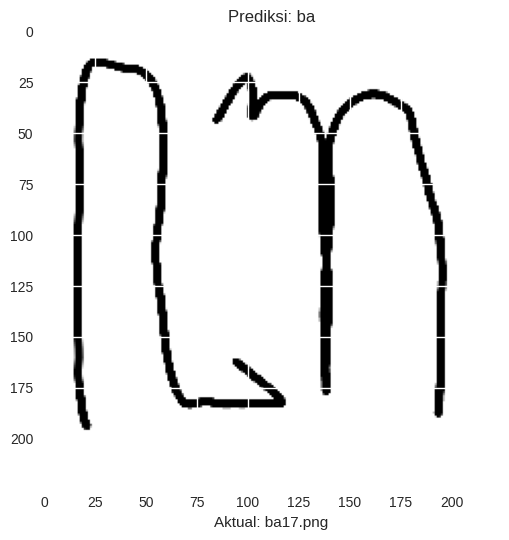

In [9]:
huruf = input("Nama huruf: ")
img_path = '/content/datasetv2/prediction/' + huruf + '17.png'

print(f"Loading image from: {img_path}")
new_image = load_image(img_path)
print(f"New image shape: {new_image.shape}")

# prediksi
# loaded_model.summary()
# os.environ['TF_XPU_DISABLE_CONV_FUSION'] = '0'  # Disable fused convolutions

pred = loaded_model.predict(new_image, batch_size=8)
print(f"Raw prediction: {pred}")

# pred *= 100
pred_class_index = np.argmax(pred)
print(f"Predicted class index: {pred_class_index}")
print(f"Predicted class name: {classes[pred_class_index]}")

img = load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.title("Prediksi: {}".format(classes[pred_class_index]))
plt.xlabel("Aktual: " + img_path.split("/")[4])
plt.tight_layout()
plt.show()

PENGUJIAN KEDUA, MEMPREDIKSI DARI MASUKKAN FILE GAMBAR

In [10]:
# Membuat widget pemilih file
upload_button = widgets.FileUpload(
    accept='',  # Semua jenis file diterima
    multiple=False  # Tidak mengizinkan unggah multiple file
)

# Fungsi untuk menangani file yang diunggah
def on_file_upload(change):
    for filename, file_info in upload_button.value.items():
        with open(filename, 'wb') as f:
            f.write(file_info['content'])
        print(f'Saved {filename} to current directory')

# Menyambungkan event handler ke widget
upload_button.observe(on_file_upload, names='value')

# Menampilkan widget
display(upload_button)


FileUpload(value={}, description='Upload')

Saved ca2.png to current directory


ca2.png
1/1 [==============================] - 0s 56ms/step
1


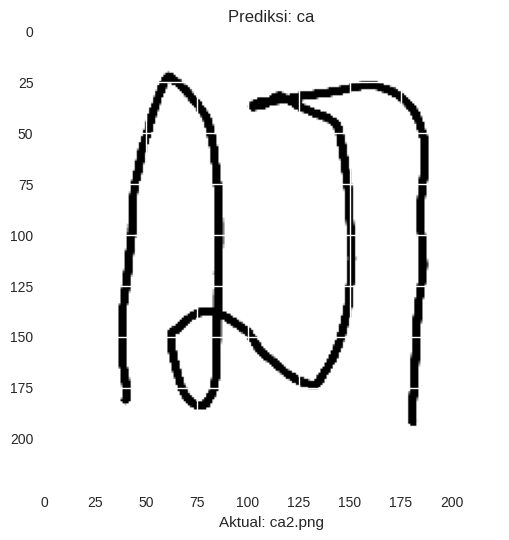

In [11]:
files = upload_button
print(files.metadata[0].get('name'))
img_path = files.metadata[0].get('name')
new_image = load_image(img_path)

# prediksi
pred = loaded_model.predict(new_image, batch_size=8)
pred *= 100
print(np.argmax(pred))

img = load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.title("Prediksi: {}".format(classes[np.argmax(pred)]))
plt.xlabel("Aktual: " + img_path)
plt.tight_layout()
plt.show()